

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 


## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [19]:
import numpy as np

**1.** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [15]:
def max_after_null(np_arr):
    zeros_positions = np_arr == 0
    search_elements = np_arr[1:][zeros_positions[:-1]]
    return search_elements.max() if search_elements.any() else None

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_after_null(x))
x = np.array([6, 2, 3, 5, 7])
print(max_after_null(x))

5
None


**2.** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [18]:
def get_nearest(x, v):
    y = np.abs(x - v)
    arg = np.argmin(y)
    return x.flat[arg]

x, v = np.arange(0,10).reshape((2, 5)), 3.6

get_nearest(x, v)

4

**3.** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [25]:
def scale(X):
    mean = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    if 0.0 in stds:
        raise ZeroDivisionError("zero value in stds")
    return (X - mean) / stds
    
    
np.random.seed(1)
X = np.random.randint(0, 10, (3, 4))
print(X)
scale(X)

[[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]]


array([[ 0.50800051,  0.57932412,  1.40487872, -0.26726124],
       [-1.3970014 , -1.40693001, -0.84292723,  1.33630621],
       [ 0.88900089,  0.82760589, -0.56195149, -1.06904497]])

**4.** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [ ]:
def get_stats(X):
    det = np.linalg.det(X)
    trace = np.trace(X)
    mx = np.max(X)
    mn = np.min(X)
    norm = np.linalg.norm(X)
    eigen_values = np.linalg.eigvals(X)
    inverse_matrix = np.linalg.inv(X)
    return det, trace, mx, mn, norm, eigen_values, inverse_matrix

np.random.seed(1)
X = np.random.normal(10, 1, (3, 3))
print(X)

det, trace, mx, mn, norm, eigen_values, inverse_matrix = get_stats(X)
print(det)
print(trace)
print(mx, mn)
print(eigen_values)
print(inverse_matrix)

**5.** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [27]:
X = np.random.normal(10, 1, (3, 4))
Y = np.random.normal(10, 1, (3, 4))
print(X.dot(Y.T))
max_elements = []
for exp_num in range(100):
    X = np.random.normal(10, 1, (10, 10))
    Y = np.random.normal(10, 1, (10, 10))
    mul = X.dot(Y)
    max_elements.append(np.max(mul))
print(np.mean(max_elements))
print(np.quantile(max_elements, 0.95))

[[458.21190949 386.89297233 429.95510228]
 [425.03065207 361.14131564 395.75102084]
 [467.84976922 394.34302605 436.08140725]]
1097.5527088698402
1135.869257349412


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [30]:
import pandas as pd
%matplotlib inline

In [31]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70000 non-null  int64  
 1   Month              70000 non-null  int64  
 2   DayofMonth         70000 non-null  int64  
 3   DayOfWeek          70000 non-null  int64  
 4   DepTime            68601 non-null  float64
 5   CRSDepTime         70000 non-null  int64  
 6   ArrTime            68444 non-null  float64
 7   CRSArrTime         70000 non-null  int64  
 8   UniqueCarrier      70000 non-null  object 
 9   FlightNum          70000 non-null  int64  
 10  TailNum            69180 non-null  object 
 11  ActualElapsedTime  68418 non-null  float64
 12  CRSElapsedTime     69991 non-null  float64
 13  AirTime            68418 non-null  float64
 14  ArrDelay           68418 non-null  float64
 15  DepDelay           68601 non-null  float64
 16  Origin             700

*    Month 1-12
*    DayofMonth 1-31
*    DayOfWeek 1 (Monday) - 7 (Sunday)
*    DepTime actual departure time (local, hhmm)
*    CRSDepTime scheduled departure time (local, hhmm)
*    ArrTime actual arrival time (local, hhmm)
*    CRSArrTime scheduled arrival time (local, hhmm)
*    UniqueCarrier unique carrier code
*    FlightNum flight number
*    TailNum plane tail number: aircraft registration, unique aircraft identifier
*    ActualElapsedTime in minutes
*    CRSElapsedTime in minutes
*    AirTime in minutes
*    ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
*    DepDelay departure delay, in minutes
*    Origin origin IATA airport code
*    Dest destination IATA airport code
*    Distance in miles
*    TaxiIn taxi in time, in minutes
*    TaxiOut taxi out time in minutes
*    Cancelled *was the flight cancelled
*    CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
*    Diverted 1 = yes, 0 = no
*    CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
*    WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
*    NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
*    SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
*    LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


**6.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [33]:
df.value_counts('CancellationCode').index[0]

'A'

`CancellationCode` - reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

Значит, наиболее частая причина отмены рейса - по вине перевозчика

**7.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [34]:
df.Distance.mean(), df.Distance.min(), df.Distance.max()

(724.5082571428571, 31, 4962)

**8.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [35]:
df[df.Distance == 31][['DayofMonth', 'DayOfWeek', 'FlightNum']]

,DayofMonth,DayOfWeek,FlightNum
1116,30,2,65
6958,26,5,65
17349,18,1,64
27534,11,2,64
46082,9,6,65
48112,28,4,64


Расстояние пройденное этими же рейсами в другие дни:

In [36]:
pd.unique(df[df.FlightNum.isin([65, 64])]['Distance'])

array([ 533,   31,  680, 2381,   82, 1005,  123,  359, 1747,  571,  372,
       2454,  581,  883,  281,  682,  414,  386])

**9.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [37]:
df.Origin.value_counts().index[0]

'ATL'

Находится в городе Атланта

**10.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [38]:
df.groupby('Origin')[['AirTime']].mean().sort_values('AirTime', ascending=False).iloc[:1]

,AirTime
Origin,
SJU,205.2


Ответ: **SJU**

**11.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [39]:
filtered = df.groupby('Origin').filter(lambda x: x['Origin'].count() < 1000)
filtered[filtered.DepDelay > 0].groupby('Origin').count().sort_values('FlightNum', ascending=False).iloc[:1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Origin,,,,,,,,,,,,,,,,,,,,,
MDW,446,446,446,446,446,446,445,446,446,446,...,445,446,446,0,446,190,190,190,190,190


Ответ: **MDW**

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [40]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70000 non-null  int64  
 1   Month              70000 non-null  int64  
 2   DayofMonth         70000 non-null  int64  
 3   DayOfWeek          70000 non-null  int64  
 4   DepTime            68601 non-null  float64
 5   CRSDepTime         70000 non-null  int64  
 6   ArrTime            68444 non-null  float64
 7   CRSArrTime         70000 non-null  int64  
 8   UniqueCarrier      70000 non-null  object 
 9   FlightNum          70000 non-null  int64  
 10  TailNum            69180 non-null  object 
 11  ActualElapsedTime  68418 non-null  float64
 12  CRSElapsedTime     69991 non-null  float64
 13  AirTime            68418 non-null  float64
 14  ArrDelay           68418 non-null  float64
 15  DepDelay           68601 non-null  float64
 16  Origin             700

In [42]:
df.isna().sum().sum()

355215

In [43]:
(df.isna().sum() > 0).sum()

16

In [44]:
(df.isna().sum(axis=1) > 0).sum()

70000

**Ответы:**
* Имеются ли в данных пропущенные значения? - Да
* Сколько всего пропущенных элементов в таблице "объект-признак"? - 355215
* Сколько объектов имеют хотя бы один пропуск? - 16
* Сколько признаков имеют хотя бы одно пропущенное значение? - 70000


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [45]:
df.DepDelay.hasnans

True

In [46]:
with_target_missed = df[df.DepDelay.isna()]
with_target_missed

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Вызвано отсутсвием информации о времени в других признаках.

In [47]:
df1 = df[~(df.DepDelay.isna() | df.DepDelay == 0)]
df1.DepDelay.hasnans

True

**13.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [56]:
data = df1.fillna(value=np.nan)
columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

features = pd.DataFrame()

for col in columns:
    date = data[col].apply(lambda x: np.nan if str(x) == 'nan' 
                                       else (4 - len(str(round(x)))) * '0' + str(round(x)))
    minute = date.apply(lambda x: np.nan if str(x) == 'nan' else int(x[2:]))
    hour = date.apply(lambda x: np.nan if str(x) == 'nan' else int(x[:2]))
    features[col + '_Hour'] = hour
    features[col + '_Minute'] = minute
print(features.head())


   DepTime_Hour  DepTime_Minute  CRSDepTime_Hour  CRSDepTime_Minute  \
0          21.0            11.0               20                 55   
1          14.0            26.0               14                 10   
2          11.0            43.0               11                 45   
3          11.0            41.0               11                 44   
4           8.0            15.0                8                 20   

   ArrTime_Hour  ArrTime_Minute  CRSArrTime_Hour  CRSArrTime_Minute  
0          23.0             8.0               23                  0  
1          17.0            30.0               17                 28  
2          15.0             1.0               15                 20  
3          13.0            23.0               13                 35  
4          12.0            43.0               13                  0  


In [57]:
date

0        2300
1        1728
2        1520
3        1335
4        1300
         ... 
69994    1118
69995    2149
69996    1314
69998    2139
69999    1005
Name: CRSArrTime, Length: 64803, dtype: object

**14.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

**Ответ:** Исключим следующие признакки, т.к. они в себе содержат задержку по заданным причинами, что напрямую влияет на итоговую задержку

In [58]:
for feature in ['CarrierDelay', 'WeatherDelay', 'NASDelay',
                'SecurityDelay', 'LateAircraftDelay', 'TailNum', 'Year']:
    data.drop(feature, axis=1, inplace=True)
data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted'],
      dtype='object')

**15.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [59]:
data['DepTime_Hour'].hist(bins=20)

KeyError: 'DepTime_Hour'

<AxesSubplot:>

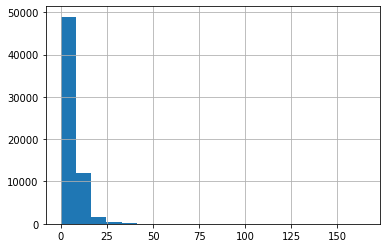

In [53]:
data['TaxiIn'].hist(bins=20)

<AxesSubplot:>

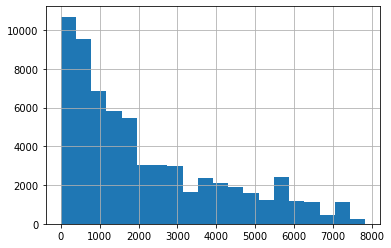

In [54]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Ответ**: Разный порядок значений (тысячи, десятки и т.д.). Масштабирвоание позволит привести все данные к одному масштабу.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [63]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
def transform_data(data):
    new_data = data.copy()
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    new_data[numeric_cols] = new_data[numeric_cols].fillna(0)
    new_data[numeric_cols] = StandardScaler().fit_transform(new_data[numeric_cols])
    for feature in data.select_dtypes(include=['object']).columns:
        new_data[feature].fillna('nan')
    new_data = pd.get_dummies(new_data)
    return new_data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [66]:
data2 = transform_data(data)

In [67]:
data2.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,CancellationCode_C
0,-0.113219,0.257061,-0.463346,1.571427,1.567022,1.566896,1.663311,-0.995271,-0.928844,-0.915024,...,0,0,0,0,0,0,0,0,0,0
1,-0.113219,-1.332356,-0.463346,0.231672,0.174967,0.514606,0.477554,0.099383,-0.001742,0.132265,...,0,0,0,0,0,0,0,0,0,0
2,0.471302,-1.445885,1.540371,-0.321833,-0.396963,0.097695,0.046370,-0.213449,0.191981,0.376154,...,0,0,0,0,0,0,0,0,0,0
3,-1.574522,0.824710,-0.463346,-0.325745,-0.399121,-0.226367,-0.337135,0.827446,-0.306164,-0.255089,...,0,0,0,0,0,0,0,0,0,0
4,-0.405479,-1.332356,1.540371,-0.963351,-1.098386,-0.372012,-0.409690,-0.914887,0.330354,0.447886,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data2.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       ...
       'Dest_VPS', 'Dest_WRG', 'Dest_WYS', 'Dest_XNA', 'Dest_YAK', 'Dest_YKM',
       'Dest_YUM', 'CancellationCode_A', 'CancellationCode_B',
       'CancellationCode_C'],
      dtype='object', length=637)

In [69]:
print('Кол-во признаков:', len(data2.columns))

Кол-во признаков: 637


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [70]:
x_tr, x_te, y_tr, y_te = train_test_split(data2.drop('DepDelay', axis=1), data2.DepDelay, test_size=0.3)

NameError: name 'df2' is not defined

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
lr = LinearRegression()
lr.fit(x_tr.iloc[:1000], y_tr[:1000])

In [ ]:
x_tr.iloc[:1000].shape, y_tr[:1000].shape

In [ ]:
mse_tr = mean_squared_error(lr.predict(x_tr.iloc[:1000]), y_tr[:1000])
mse_te = mean_squared_error(lr.predict(x_te), y_te)

r2_tr = r2_score(lr.predict(x_tr.iloc[:1000]), y_tr[:1000])
r2_te = r2_score(lr.predict(x_te), y_te)

print(f'MSE train: {mse_tr:.2f}\nMSE test: {mse_te:.2f}')
print(f'R2 train: {r2_tr:.2f}\nR2 test: {r2_te:.2f}')

In [ ]:
lr.coef_.mean()

**Ответ**

Проблемы: модель переобучилась

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18.** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold

In [ ]:
subset_x = x_tr[:1000]
subset_y = y_tr[:1000]

kf = KFold(n_splits=5)

lasso_cv = LassoCV()
ridge_cv = RidgeCV()

lasso_cv.fit(subset_x, subset_y)
print(f'Best alpha for Lasso: {lasso_cv.alpha_}')

ridge_cv.fit(subset_x, subset_y, )
print(f'Best alpha for Ridge: {ridge_cv.alpha_}')

In [ ]:
mse_tr = mean_squared_error(lasso_cv.predict(x_tr.iloc[:1000]), y_tr[:1000])
mse_te = mean_squared_error(lasso_cv.predict(x_te), y_te)

r2_tr = r2_score(lasso_cv.predict(x_tr.iloc[:1000]), y_tr[:1000])
r2_te = r2_score(lasso_cv.predict(x_te), y_te)

print(f'MSE train (lasso): {mse_tr:.2f}\nMSE test: {mse_te:.2f}')
print(f'R2 train (lasso): {r2_tr:.2f}\nR2 test: {r2_te:.2f}')


mse_tr = mean_squared_error(ridge_cv.predict(x_tr.iloc[:1000]), y_tr[:1000])
mse_te = mean_squared_error(ridge_cv.predict(x_te), y_te)

r2_tr = r2_score(ridge_cv.predict(x_tr.iloc[:1000]), y_tr[:1000])
r2_te = r2_score(ridge_cv.predict(x_te), y_te)

print(f'MSE train (ridge): {mse_tr:.2f}\nMSE test: {mse_te:.2f}')
print(f'R2 train (ridge): {r2_tr:.2f}\nR2 test: {r2_te:.2f}')

**Ответ**: Да, добавление регуляризации позволило решить проблему переобучения

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19.** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
x_tr['unit_feature'] = 1
x_te['unit_feature'] = 1

**20.** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
def make_pred(X, w):
    return w.dot(X.T)

In [7]:
def get_func(w, X, y):
    pred = make_pred(X, w)
    perc = (y - pred) / (y + 1e-7)
    return np.mean(np.square(perc))

In [8]:
def get_grad(w, X, y):
    y_pred = make_pred(X, w)
    loss = y_pred - y
    z = (loss / (y + 1e-7) / (y + 1e-7)).dot(X)
    return 2 * z / X.shape[0] 

In [10]:
def get_reg_func(w, X, y):
    pred = make_pred(X, w)
    perc = (y - pred) / (y + 1e-7)
    return np.mean(np.square(perc)) + np.linalg.norm(w)

In [11]:
def get_reg_grad(w, X, y):
    y_pred = make_pred(X, w)
    loss = y_pred - y
    z = (loss / (y + 1e-7) / (y + 1e-7)).dot(X)
    return 2 * z / X.shape[0] + w / X.shape[0]

**21.** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [12]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg, verbose=False):
    if is_reg:
        f_cost = get_reg_func
        f_grad = get_reg_grad
    else:
        f_cost = get_func
        f_grad = get_grad
    
    w = w0.copy()
    history = []
    w_prev = None
    success = True
    for i in range(max_iter):
        if w_prev is not None and np.linalg.norm(w_prev - w) < eps:
            break
        mpse = f_cost(w, X, y)
        history.append(mpse)
        
        mpse_grad = f_grad(w, X, y)
        w_prev = w.copy()
        w = w - step_size * mpse_grad
        if verbose:
            print(f'{i}: {mpse:.3f}')
        
        if i > 1 and mpse > 1e6:
            success = False
            break
    return w, history, success
        
        

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [13]:
w = np.random.rand(x_tr.shape[1])
_, history, _ = grad_descent(x_tr, y_tr, w, 1e-3, 500, 1e-3, False, True)

NameError: name 'np' is not defined

In [ ]:
hists = []
for lr in [10, 1, 0.001]:
    w = np.random.rand(x_tr.shape[1])
    _, history, success = grad_descent(x_tr, y_tr, w, lr, 50, 1e-5, False, False)
    hists.append(('rand', lr, success, history))
    print(lr)
    w = np.zeros(x_tr.shape[1])
    _, history, success = grad_descent(x_tr, y_tr, w, lr, 50, 1e-5, False, False)
    hists.append(('zero', lr, success, history))
    print(lr)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
for init_type, lr, success, history in hists:
    if success:
        plt.plot(np.arange(len(history)), history, label=f'{init_type}_{lr}')
plt.legend()
plt.grid()
plt.ylim([0, 40])

plt.show()

**Ответ:**

Параметры сильно влияют на сходимость и качество. При слишком большом размере шага алгоритм расходится, т.к. ошибка быстро растёт.

При размере шага 0.001 алгоритм сходится, причём быстрее это происходит при инициализации весов нулями

**22.** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
w = np.random.rand(x_tr.shape[1])
_, history_usual, _ = grad_descent(x_tr, y_tr, w, 1e-3, 100, 1e-3, False, False)
w = np.random.rand(x_tr.shape[1])
_, history_reg, _ = grad_descent(x_tr, y_tr, w, 1e-3, 100, 1e-3, True, False)

In [ ]:
plt.plot(np.arange(len(history_usual)), history_usual, label='Usual')
plt.plot(np.arange(len(history_reg)), history_reg, label='Reg')
plt.legend()
plt.grid()
plt.ylim([0, 100])

plt.show()

**Ответ:** Значения функционала уменьшаются в обоих случах, но асолютное значение больше в случае с регаляризацией, т.к. к обычном функциналу добавляется слагаемое в виде L2-нормы весов.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23.**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, w0, step_size, max_iter, eps, is_reg, verbose=False):
    if is_reg:
        f_cost = get_reg_func
        f_grad = get_reg_grad
    else:
        f_cost = get_func
        f_grad = get_grad
    
    w = w0.copy()
    history = []
    w_prev = None
    success = True
    idxs = np.arange(len(X))
    
    non_changed = 0
    for i in range(max_iter):
        if w_prev is not None and np.linalg.norm(w_prev - w) < eps:
            non_changed += 1
        else:
            non_changed = 0
        if non_changed == 10:
            break
        
        idx = np.random.choice(idxs)
        x = X.iloc[idx].to_numpy().reshape(1, -1)
        _y = y.iloc[idx]
        
        
        mpse = f_cost(w, X, y)
        history.append(mpse)
        
        mpse_grad = f_grad(w, x, _y)
        w_prev = w.copy()
        w = w - step_size * mpse_grad

        if verbose and i % 100 == 0:
            print(f'{i}: {mpse:.3f}')
        
        if i > 1 and mpse > 1e9:
            success = False
            break
    return w, history, success

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
w = np.random.rand(x_tr.shape[1])
_, history_usual, _ = sgd(x_tr, y_tr, w, 1e-5, 500, 1e-3, False, True)

w = np.random.rand(x_tr.shape[1])
_, history_reg, _ = sgd(x_tr, y_tr, w, 1e-5, 500, 1e-3, True, True)

In [ ]:
plt.plot(np.arange(len(history_usual)), history_usual, label='Usual')
plt.plot(np.arange(len(history_reg)), history_reg, label='Reg')
plt.legend()
plt.grid()

plt.show()

In [ ]:
print(f'Test MSE: {mean_squared_error(make_pred(w, x_te), y_te)}')
print(f'Test MPSE: {get_func(w, x_te, y_te)}')
print(f'Test R2: {r2_score(make_pred(w, x_te), y_te)}')

**24.** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

**Ответ:** При использовании регуляризации в случае стохастического градиентного спуска сходимость была быстрее потому что учитывалось влияение весовых коэффициентов

**25.** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
lr = LinearRegression()
lr.fit(x_tr, y_tr)

mspe = get_func(lr.coef_, x_te, y_te)
print(f'MSPE: {mspe}')

**Ответ:** Значение MPSE значительно больше, чем в п.22, потому что стандартная линейная регрессия минимизирует функционал MSE.